<a href="https://colab.research.google.com/github/WMFrts/processamento-de-linguagem-natural/blob/main/processamento_de_linguagem_natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> <center> PROCESSAMENTO DE LINGUAGEM NATURAL (PLN)</center> </h2>


<p align = 'JUSTIFY'>Processamento de linguagem natural é uma vertente da inteligência artificial que ajuda computadores a entender, interpretar e manipular a linguagem humana. O PLN resulta de diversas disciplinas, incluindo ciência da computação e linguística computacional, que buscam preencher a lacuna entre a comunicação humana e o entendimento dos computadores.

<hr size="1" width="100%" align="center" noshade> 

**1 BIBLIOTECAS**

In [1]:
#importação de bibliotecas

import bs4 as bs   #para leitura e processamento de dados da web
import urllib.request   #para fazer requesição 
import nltk    #Natural Language Toolkit
import spacy 

In [ ]:
! python3 -m spacy download pt   #pacotes em português

**2 MARCAÇÃO POS (PART-OF-SPEECH)**

<p align = 'JUSTIFY'> É preciso saber o que o texto contém, para tanto, a marcação pos, atribui às palavras as devidas classes, como substantivos, adjetivos, verbos etc 



In [3]:
pln = spacy.load('pt')   #carregamento do modelo em português para o objeto
pln

In [4]:
documento = pln('O funcionamento do Spacy é por orientação a objeto. Aqui foi criado o objeto pln, então aqui os métodos serão chamados')


In [5]:
type(documento)

spacy.tokens.doc.Doc

In [6]:
for token in documento:
  print(token.text, token.pos_)

O DET
funcionamento NOUN
do PROPN
Spacy PROPN
é VERB
por ADP
orientação NOUN
a ADP
objeto NOUN
. PUNCT
Aqui ADV
foi AUX
criado VERB
o DET
objeto PROPN
pln PROPN
, PUNCT
então ADV
aqui ADV
os DET
métodos SYM
serão AUX
chamados VERB


**3 LEMATIZAÇÃO E STEMIZAÇÃO**

<p align = 'JUSTIFY'> O processo de stemização (stemming) consiste em reduzir uma palavra ao seu radical. Já a lematização reduz a palavra ao seu lema, que é a forma no masculino e singular.

In [7]:
for token in documento:
  print(token.text, token.lemma_)

O O
funcionamento funcionamento
do do
Spacy Spacy
é ser
por por
orientação orientação
a o
objeto objeto
. .
Aqui Aqui
foi ser
criado criar
o o
objeto objeto
pln pln
, ,
então então
aqui aqui
os o
métodos método
serão ser
chamados chamar


In [8]:
doc = pln('um lematizador opera em uma única palavra sem conhecimento do contexto e,portanto, não pode discriminar entre palavras que têm significados diferentes dependendo da classe gramatical.')
[token.lemma_ for token in doc]   #criação de uma lista 

['um',
 'lematizador',
 'operar',
 'em',
 'umar',
 'único',
 'palavra',
 'sem',
 'conhecimento',
 'do',
 'contexto',
 'e',
 ',',
 'portanto',
 ',',
 'não',
 'poder',
 'discriminar',
 'entrar',
 'palavra',
 'que',
 'ter',
 'significar',
 'diferente',
 'depender',
 'da',
 'classe',
 'gramatical',
 '.']

In [9]:
#stemização com nltk

import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [10]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('processamento')

'process'

In [11]:
for token in documento:
  print(token.text, token.lemma_, stemmer.stem(token.text))
  

O O o
funcionamento funcionamento funcion
do do do
Spacy Spacy spacy
é ser é
por por por
orientação orientação orient
a o a
objeto objeto objet
. . .
Aqui Aqui aqu
foi ser foi
criado criar cri
o o o
objeto objeto objet
pln pln pln
, , ,
então então ent
aqui aqui aqu
os o os
métodos método métod
serão ser ser
chamados chamar cham


**4 CARREGAMENTO DE TEXTOS**

In [12]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [13]:
#recriação da variável para a leitura

dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","mar\xc3\xa7o","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"aa61c32d-676f-4fb0-b185-666b933f5237","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Intelig\xc3\xaancia_artificial","wgTitle":"Intelig\xc3\xaancia artificial","wgCurRevisionId":62586855,"wgRevisionId":62586855,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!P\xc3\xa1ginas com erros e

In [ ]:
#leitura do código html
#'lxml' (para leitura de html e xml):parser, analisador sintático. Sua função é ler uma entrada de dados que possuem certas regras específicas

dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html   #retorna todas as tags html

In [15]:
#o conteúdo textual segue a tag 'p', para selecionar:

paragrafos = dados_html.find_all('p')


In [16]:
#para saber quantos paragrafos

len(paragrafos)

105

In [17]:
#em cada posição há um texto

paragrafos[1]

<p><b>Inteligência artificial</b> (por vezes mencionada pela sigla em português <b>IA</b> ou pela sigla em inglês <b>AI</b> - <i>artificial intelligence</i>) é a <a href="/wiki/Intelig%C3%AAncia" title="Inteligência">inteligência</a> similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um <a href="/wiki/Agente_inteligente" title="Agente inteligente">agente inteligente</a> é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. <a href="/wiki/Andreas_Kaplan" title="Andreas Kaplan">Andreas Kaplan</a> e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.<sup class="reference" i

In [18]:
#para selecionar sem as tags

paragrafos[1].text

'Inteligência artificial (por vezes mencionada pela sigla em português IA ou pela sigla em inglês AI - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. Andreas Kaplan e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] John McCarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em Darmouth Colege" Gubern, Román: O Eros Eletrónico), a define como "a ciência e engenharia de produzir sistemas inteligentes". É uma área de p

In [19]:
#para ter todo o conteúdo, os paragrafos devem ser concatenados

conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [39]:
conteudo

'\n\t\tPáginas para editores conectados saiba mais\nInteligência artificial (por vezes mencionada pela sigla em português IA ou pela sigla em inglês AI - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. Andreas Kaplan e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] John McCarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em Darmouth Colege" Gubern, Román: O Eros Eletrónico), a define como "a ciência e engenharia 

In [20]:
#transformação em letras minúsculas 

conteudo = conteudo.lower()
conteudo

'\n\t\tpáginas para editores conectados saiba mais\ninteligência artificial (por vezes mencionada pela sigla em português ia ou pela sigla em inglês ai - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. andreas kaplan e michael haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] john mccarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em darmouth colege" gubern, román: o eros eletrónico), a define como "a ciência e engenharia 

**5 BUSCAS EM TEXTOS COM SPACY**

In [21]:
#criação de objeto para carregamento do modelo spacy em português

pln = spacy.load('pt')
pln

In [22]:
#inicio da busca

string = 'turing'
token_pesquisa = pln(string)   #método no objeto criado

In [23]:
#classe do spacy para criação do mecanismo de busca

from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)   #criado objeto e em vocab tem o vocabulário do português
matcher.add('SEARCH', None, token_pesquisa)   #adição da busca

In [24]:
#retorno da busca

doc = pln(conteudo) 
matches = matcher(doc)   #variável para receber o resultado
matches   #retorna uma lista com todos os resultados

[(8661325627334373315, 3044, 3045),
 (8661325627334373315, 3054, 3055),
 (8661325627334373315, 3210, 3211),
 (8661325627334373315, 3215, 3216),
 (8661325627334373315, 3221, 3222),
 (8661325627334373315, 3284, 3285),
 (8661325627334373315, 3916, 3917),
 (8661325627334373315, 5191, 5192),
 (8661325627334373315, 8660, 8661),
 (8661325627334373315, 8796, 8797),
 (8661325627334373315, 8892, 8893),
 (8661325627334373315, 9009, 9010)]

In [25]:
#explicação sobre o retorno da busca

#(8661325627334373315, 3044, 3045) ------> (id da busca, índice da posição inicial, índice da posição final)

doc[3044:3045]   #posição inicial e final da palavra

turing

In [26]:
#é possivel manipular os índices para saber o que tem antes ou depois, a fim de saber o cotexto da busca 

doc[3044-6:3044+11]

. uma contribuição prática de alan turing foi o que se chamou depois de teste de turing

In [42]:
#para melhorar a visualização: geração de html dentro do python

texto = ''   #inicializar com vazio para não concatenar com o anterior 

from IPython.core.display import HTML   
numero_palavras = 50   #número de palavras antes e depois da palavra procurada 
doc = pln(conteudo)
matches = matcher (doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados: </strong>{len(matches)}</p>"""))

for i in matches:
  inicio = i[1] - numero_palavras   #para as palavras anteriores
  if inicio < 0:   #caso a primeira palavra já seja a que está sendo buscada
    inicio = 0
  texto += str(doc[inicio:i[2] + numero_palavras]). replace(string, f"<mark>{string}</mark>") #para as palavras posteriores e
                                                                                              #quando a string for encontrada, será substitida pela string
                                                                                              #mas dentro da tag realce
  texto += "<br /><br />"   #espaço entre os textos

display(HTML(f"""...{texto}..."""))


**6 EXTRAÇÃO DE ENTIDADES NOMEADAS**

<p align = 'JUSTIFY'> O REN consiste na tarefa de identificar as ENs,
na sua maioria nomes próprios, a partir de textos de
forma livre e classificá-las dentro de um conjunto
de tipos de categorias pré-definidas, tais como Pessoa, Organização e Local, as quais remetem a um referente específico. 

In [44]:
#retorno das entidades do texto

for entidade in doc.ents:
  print(entidade.text, entidade.label_)


andreas kaplan PER
michael haenlein PER
john mccarthy PER
gubern PER
román LOC
inteligente[2 MISC
cotidiano).[4 ORG
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
google ORG
wikipedia MISC
john mccarthy PER
racionalmente".[10][11 MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
problem solver PER
gps PER
newell PER
gps ORG
brasil LOC
associação brasileira de inteligência artificial ORG
allen newell PER
herbert simon PER
universidade carnegie mellon ORG
marvin minsky PER
mit ai lab MISC
conferência de verão de 1956 MISC
darthmouth college.[14 LOC
advanced research projects agency” ORG
estados unidos LOC
generation project” MISC
japão LOC
sub-simbólico"?[16 LOC
john haugeland PER
good old-fashioned artificial intelligence MISC
w. grey walter PER
johns hopkins PER
universidade de princeton LOC
club ORG
inglater

In [45]:
#recurso visual do spacy para observar as entidades

from spacy import displacy 
displacy.render(doc, style = 'ent', jupyter = True)

**7 NUVEM DE PALAVRAS - Quais os termos mais frequentes do texto?**

In [69]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['blue', 'purple', 'black', 'orange'])   #seleção das cores em lista

In [96]:
#para a nuvem

from wordcloud import WordCloud
cloud = WordCloud(background_color= 'white', max_words= 40, colormap = color_map)

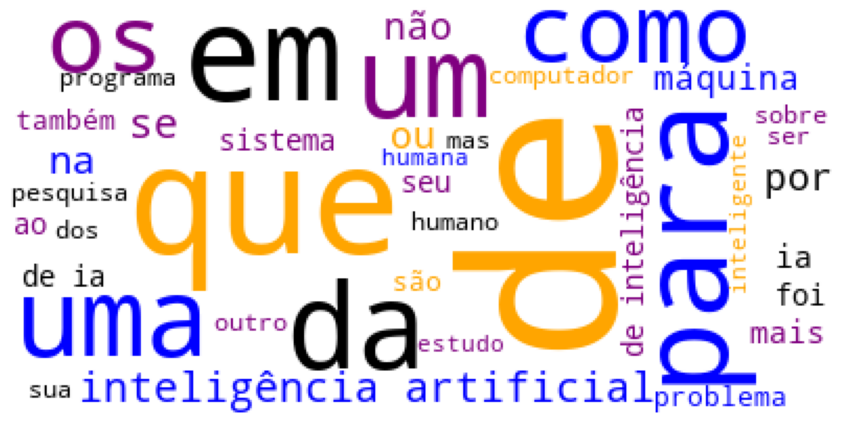

In [97]:
#mais uma importação para visualizar a nuvem

import matplotlib.pyplot as plt

cloud = cloud.generate(conteudo)
plt.figure(figsize = (15, 15))
plt.imshow(cloud)
plt.axis('off')   #desliga a visualização dos eixos 
plt.show()

In [98]:
#remoção de stop words

from spacy.lang.pt.stop_words import STOP_WORDS

In [99]:
#quantidade de stop words que será removida

len(STOP_WORDS)

413

In [100]:
#as strigs pecisam ser percorridas para retirar as stop word
#é necessário mudar o formato para spacy

doc = pln(conteudo)
lista_token = []
for token in doc:
  lista_token.append(token.text)

In [101]:
#verificação
#agora está no formato do spacy

print(lista_token)

['\n\t\t', 'páginas', 'para', 'editores', 'conectados', 'saiba', 'mais', '\n', 'inteligência', 'artificial', '(', 'por', 'vezes', 'mencionada', 'pela', 'sigla', 'em', 'português', 'ia', 'ou', 'pela', 'sigla', 'em', 'inglês', 'ai', '-', 'artificial', 'intelligence', ')', 'é', 'a', 'inteligência', 'similar', 'à', 'humana', 'exibida', 'por', 'sistemas', 'de', 'software', ',', 'além', 'de', 'também', 'ser', 'um', 'campo', 'de', 'estudo', 'acadêmico', '.', 'os', 'principais', 'pesquisadores', 'e', 'livros', 'didáticos', 'definem', 'o', 'campo', 'como', '"', 'o', 'estudo', 'e', 'projeto', 'de', 'agentes', 'inteligentes', '"', ',', 'onde', 'um', 'agente', 'inteligente', 'é', 'um', 'sistema', 'que', 'percebe', 'seu', 'ambiente', 'e', 'toma', 'atitudes', 'que', 'maximizam', 'suas', 'chances', 'de', 'sucesso', '.', 'andreas', 'kaplan', 'e', 'michael', 'haenlein', 'definem', 'a', 'inteligência', 'artificial', 'como', '“', 'uma', 'capacidade', 'do', 'sistema', 'para', 'interpretar', 'corretamente'

In [102]:
#nesse formato, é possível percorrer cada token e aplicar ".is_stop"

sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)


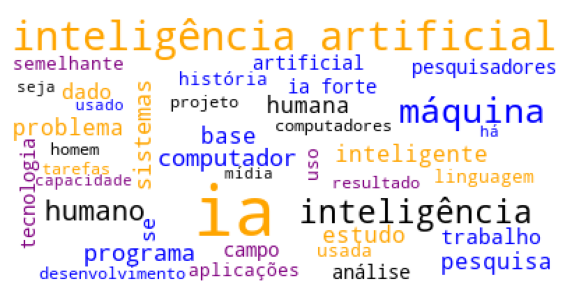

In [104]:
#retoma o código, mas passa a lista sem stop words

import matplotlib.pyplot as plt

cloud = cloud.generate(' '.join(sem_stop))   #converteu a lista em string com ''.join que junta cada elemento da lista com um espaço vazio
plt.figure(figsize = (10, 10))
plt.imshow(cloud)
plt.axis('off')   #desliga a visualização dos eixos 
plt.show()